In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()
print("X_train length: ", len(X_train))
print("X_test length", len(X_test))

X_train length:  60000
X_test length 10000


In [3]:
print("Shape of X_train: ", X_train[0].shape)

Shape of X_train:  (28, 28)


In [4]:
print("The information of X_train data: ")
print(X_train[0])

The information of X_train data: 
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0 

The picture of X_train: 


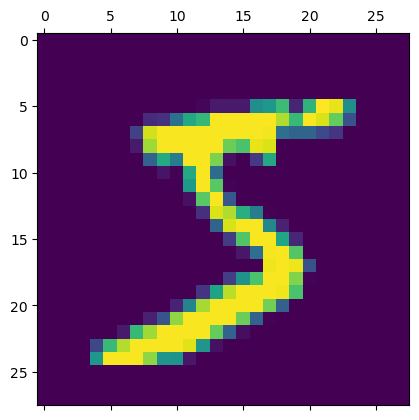

In [5]:
print("The picture of X_train: ")
plt.matshow(X_train[0])

In [6]:
print("Y_train[0]: ",y_train[0])

Y_train[0]:  5


In [7]:
# Divide X_train data with 255 (converts into float number between 0 to 1)

X_train = X_train/255
X_test = X_test/255

In [8]:
# Flatten training data

X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

print(X_train_flattened.shape)

(60000, 784)


In [9]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(
    optimizer = 'adam', 
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)



Epoch 1/5


1875/1875 [==============================] - 2s 967us/step - loss: 0.4664 - accuracy: 0.8807
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3039 - accuracy: 0.9153
Epoch 3/5
1875/1875 [==============================] - 2s 976us/step - loss: 0.2834 - accuracy: 0.9214
Epoch 4/5
1875/1875 [==============================] - 2s 942us/step - loss: 0.2727 - accuracy: 0.9236
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2668 - accuracy: 0.9259


In [10]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 917us/step - loss: 0.2690 - accuracy: 0.9254


[0.269010454416275, 0.9254000186920166]

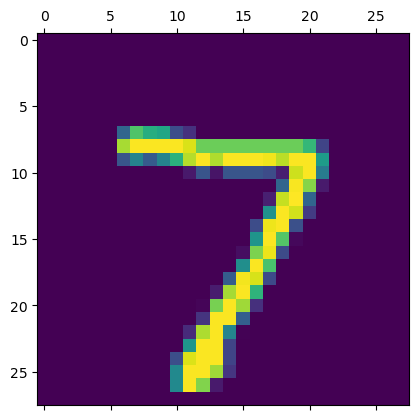

In [11]:
plt.matshow(X_test[0])

In [12]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]


313/313 [==============================] - 0s 972us/step


array([4.3578375e-02, 5.0055002e-07, 8.7551989e-02, 9.6456546e-01,
       5.3584320e-03, 1.4412983e-01, 2.3835653e-06, 9.9985522e-01,
       1.1153733e-01, 7.3689014e-01], dtype=float32)

In [13]:
np.argmax(y_predicted[0])

7

In [14]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [15]:
cm = tf.math.confusion_matrix(labels = y_test, predictions=y_predicted_labels)
print(cm)

tf.Tensor(
[[ 964    0    1    2    0    4    6    2    1    0]
 [   0 1117    3    2    0    1    4    2    6    0]
 [   5    9  926   22    9    3   13   10   31    4]
 [   3    0   18  927    1   22    2    9   19    9]
 [   2    1    3    1  925    0   11    3    9   27]
 [  12    3    4   33   12  770   18    6   28    6]
 [  12    3    6    1    7   11  915    2    1    0]
 [   1    8   23    8    9    0    0  942    1   36]
 [   8   11    7   25    9   23    9   11  864    7]
 [  11    7    1   11   47    5    0   17    6  904]], shape=(10, 10), dtype=int32)


Text(95.72222222222221, 0.5, 'Truth')

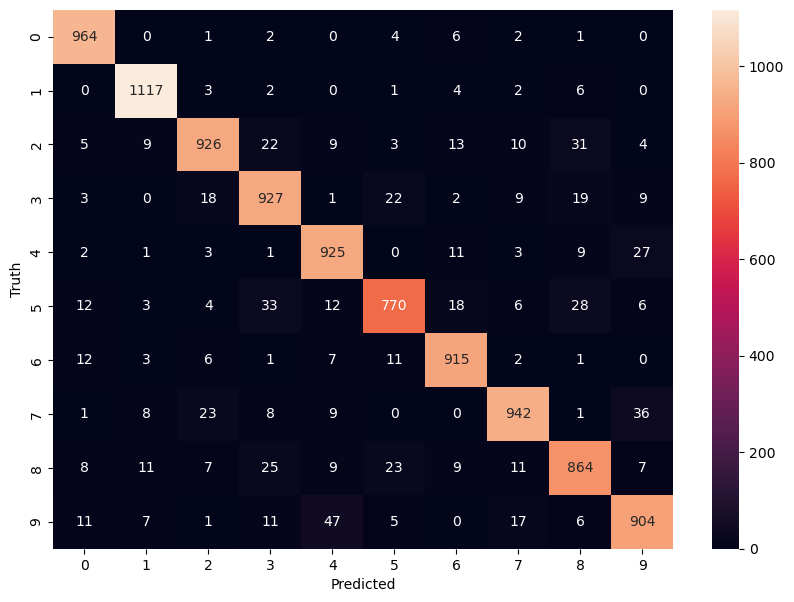

In [16]:
# Make result above more visualized

import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [17]:
model2 = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model2.compile(
    optimizer = 'adam', 
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model2.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2772 - accuracy: 0.9215
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1288 - accuracy: 0.9623
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0899 - accuracy: 0.9729
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0686 - accuracy: 0.9796
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0548 - accuracy: 0.9827


In [18]:
model2.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 988us/step - loss: 0.0825 - accuracy: 0.9752


[0.08251144737005234, 0.9751999974250793]

313/313 [==============================] - 0s 860us/step


Text(95.72222222222221, 0.5, 'Truth')

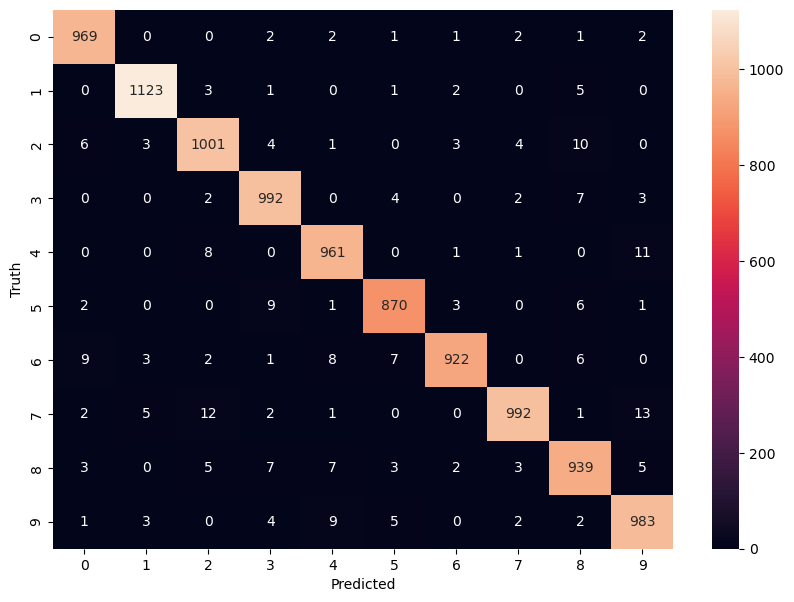

In [19]:
y_predicted = model2.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels = y_test, predictions=y_predicted_labels)

import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [24]:
model3 = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/adam", histogram_freq=1)

model3.compile(
    optimizer = 'adam', 
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model3.fit(X_train, y_train, epochs=5, callbacks=[tb_callback])

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2686 - accuracy: 0.9233
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1223 - accuracy: 0.9636
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0846 - accuracy: 0.9746
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0644 - accuracy: 0.9801
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0506 - accuracy: 0.9844


run 
```sh
tensorboard --logdir logs
```
to see graphed logs